# Make a catalog to cross-match to for astrometry

Gaia does not seem to have enough stars, nor  does 2MASS

VVV does, but the matches aren't good enough, so we need to use our own...

In [1]:
import numpy as np

In [2]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
from astropy.table import Table
from astropy.io import fits
from astropy import wcs
from astropy.wcs import WCS
import regions
from astroquery.vizier import Vizier

In [3]:
from astropy.visualization import quantity_support

In [4]:
%matplotlib inline
import pylab as pl

In [5]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [6]:
fov = regions.Regions.read(f'{basepath}/regions/nircam_brick_fov.reg')

In [7]:
coord = fov[0].center
height = fov[0].height
width = fov[0].width
height, width = width, height # CARTA wrote it wrong
coord, width, height

(<SkyCoord (ICRS): (ra, dec) in deg
     (266.53496367, -28.71007499)>,
 <Quantity 161.9038 arcsec>,
 <Quantity 391.024 arcsec>)

In [8]:
Gaia.ROW_LIMIT = 10000
rslt = Gaia.query_object_async(coordinate=coord, width=width, height=height)

INFO: Query finished. [astroquery.utils.tap.core]


In [9]:
gaiacrds = SkyCoord(rslt['ra'], rslt['dec'], frame='icrs')
len(gaiacrds)

306

In [10]:
regs = regions.Regions([regions.PointSkyRegion(crd) for crd in gaiacrds])

In [11]:
regs.write(f'{basepath}/regions/gaia_sources.reg', overwrite=True)

In [12]:
Vizier.find_catalogs('2MASS Point Source')

OrderedDict([('II/246', </>), ('II/281', </>), ('J/ApJS/184/138', </>)])

In [13]:
Vizier.ROW_LIMIT = 5e4

In [14]:
galnuc2019 = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['J/A+A/631/A20'])[0]
galnuc2019[:3]

<Table length=3>
 RAJ2000   e_RAJ2000    DEJ2000    e_DEJ2000     RAJdeg    e_RAJdeg     DEJdeg     e_DEJdeg     RAHdeg    e_RAHdeg     DEHdeg   ...  DEKsdeg    e_DEKsdeg     Jmag    e_Jmag    Hmag    e_Hmag   Ksmag   e_Ksmag    iJ    iH   iKs 
   deg       arcsec       deg        arcsec       deg       arcsec       deg        arcsec       deg       arcsec       deg     ...    deg        arcsec      mag      mag      mag      mag      mag      mag                     
 float64    float64     float64     float64     float64    float64     float64     float64     float64    float64     float64   ...  float64     float64    float64  float64  float64  float64  float64  float64  uint8 uint8 uint8
--------- ------------ ---------- ------------ --------- ------------ ---------- ------------ --------- ------------ ---------- ... ---------- ------------ -------- -------- -------- -------- -------- -------- ----- ----- -----
266.51151  0.000000000 -28.757747  0.000000000 266.51151  0.001987759 -28.757747  0.002155650 266.51151  0.001987759 -28.757747 ... -28.757747  0.002155650 12.67029  0.00486 12.22915  0.01243 12.19240  0.01123     2     2     2
266.52640  0.001296887 -28.748615  0.001615686 266.52640  0.001919700 -28.748616  0.002009142 266.52640  0.001989142 -28.748614 ... -28.748615           -- 13.64379  0.00700 12.82945  0.01289 12.60900  0.01718     2     2     2
266.52081  0.000648459 -28.747770  0.000807829 266.52081  0.001160735 -28.747769           -- 266.52081           -- -28.747770 ... -28.747770           -- 14.04259  0.00401 13.46765  0.01227 13.46750  0.01181     2     2     2

In [15]:
galnuc2021 = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['J/A+A/653/A133'])[0]
galnuc2021[:3]

<Table length=3>
 RAJ2000   e_RAJ2000    DEJ2000    e_DEJ2000     Jmag    e_Jmag    Hmag    e_Hmag   Ksmag   e_Ksmag   FJH   FHK  ...  e_AJ1JH     AH1JH     e_AH1JH     AH1HK     e_AH1HK     AK1HK     e_AK1HK     AH2HK     e_AH2HK     AK2HK     e_AK2HK  
   deg       arcsec       deg        arcsec      mag      mag      mag      mag      mag      mag                ...    mag        mag        mag        mag        mag        mag        mag        mag        mag        mag        mag    
 float64    float64     float64     float64    float64  float64  float64  float64  float64  float64  int16 int16 ...  float64    float64    float64    float64    float64    float64    float64    float64    float64    float64    float64  
--------- ------------ ---------- ------------ -------- -------- -------- -------- -------- -------- ----- ----- ... ---------- ---------- ---------- ---------- ---------- ---------- ---------- ---------- ---------- ---------- ----------
266.51151  0.000000000 -28.757747  0.000000000 12.67029  0.00486 12.22915  0.01243 12.19240  0.01123     1     1 ...   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000
266.52640  0.001296887 -28.748615  0.001615686 13.64379  0.00700 12.82945  0.01289 12.60900  0.01718     1     1 ...   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000
266.52081  0.000648459 -28.747770  0.000807829 14.04259  0.00401 13.46765  0.01227 13.46750  0.01181     1     1 ...   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000   -1.00000

In [16]:
# FK5 because it says 'J2000' on the Vizier page (same as twomass)
galnuc2021_crds = SkyCoord(galnuc2021['RAJ2000'], galnuc2021['DEJ2000'], frame='fk5')

In [17]:
vvvdr2 = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['II/348/vvv2'])[0]
vvvdr2[:3]
len(vvvdr2)

4693

In [18]:
vvvdr2.write(f'{basepath}/regions/vvvdr2.fits', overwrite=True)

In [19]:
# FK5 because it says 'J2000' on the Vizier page (same as twomass)
vvvdr2_crds = SkyCoord(vvvdr2['RAJ2000'], vvvdr2['DEJ2000'], frame='fk5')

In [20]:
Vizier.ROW_LIMIT = 1e4
twomass = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['II/246'])[0]
twomass[:3]

<Table length=3>
 RAJ2000    DEJ2000        _2MASS        Jmag   e_Jmag   Hmag   e_Hmag   Kmag   e_Kmag Qflg Rflg Bflg Cflg  Xflg  Aflg
   deg        deg                        mag     mag     mag     mag     mag     mag                                  
 float64    float64        str17       float32 float32 float32 float32 float32 float32 str3 str3 str3 str3 uint8 uint8
---------- ---------- ---------------- ------- ------- ------- ------- ------- ------- ---- ---- ---- ---- ----- -----
266.546943 -28.752007 17461126-2845072  14.314      --  13.123   0.103  10.854      --  UAU  020  010  000     0     0
266.543681 -28.762333 17461048-2845443  16.551      --  13.405   0.074  11.001   0.043  UBA  022  011  0c0     0     0
266.543638 -28.753548 17461047-2845127  17.043      --  14.264      --  13.001   0.114  UUB  002  003  00c     0     0

In [21]:
twomass.meta['description'] = '2MASS Point Source Catalog'

In [22]:
twomass.write(f'{basepath}/regions/twomass.fits', overwrite=True)

In [23]:
# FK5 because it says 'J2000' on the Vizier page
twomass_crds = SkyCoord(twomass['RAJ2000'], twomass['DEJ2000'], frame='fk5')

# Test cross-match (to be put in the pipeline when it works)

Work on June 28, 2023

previously had tried F212N, but now using F410M b/c that's our target reference catalog

(maybe F405N is better)


trying f405n...

In [24]:
from astropy.table import Table

In [25]:
filtername = 'f410m'
module = 'nrca'
catfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_cat.ecsv'
imfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_i2d.fits'
crowdcatfile = f'{basepath}/{filtername.upper()}/{filtername}_{module}_crowdsource_nsky0.fits'
cat = Table.read(catfile)
cat.write(catfile.replace('ecsv', 'fits'), overwrite=True) # for CARTA viewing
crowdcat = Table.read(crowdcatfile)
len(cat), len(crowdcat)

(6034, 74181)

In [26]:
cat[:3]

<Table length=3>
label xcentroid ycentroid              sky_centroid              aper_bkg_flux ...              sky_bbox_ll                            sky_bbox_ul                           sky_bbox_lr                           sky_bbox_ur             
                                         deg,deg                       Jy      ...                deg,deg                                deg,deg                               deg,deg                               deg,deg               
int64  float64   float64                 SkyCoord                   float64    ...                SkyCoord                               SkyCoord                              SkyCoord                              SkyCoord              
----- --------- --------- -------------------------------------- ------------- ... -------------------------------------- ------------------------------------- ------------------------------------- -------------------------------------
    1 1571.5853    5.6673  266.5128769037203,-28.735338298846052  2.350425e-07 ... 266.51283534467456,-28.735427754133244 266.51295489643644,-28.73542607288981 266.5128311905167,-28.735200624941136  266.5129507420188,-28.73519894370121
    2 1586.1330    8.5024 266.51292874566576,-28.735083334360272  1.179718e-06 ...  266.5128308709668,-28.735183153464817 266.5131098244194,-28.735179230408708  266.5128254386356,-28.73488613836736 266.51310439129554,-28.73488221532197
    3 1530.4270  121.2815 266.51519371660936,-28.736024980296726  4.222364e-06 ... 266.51293664780553,-28.740966212090648     266.5180776426428,-28.74089381996 266.5127813420311,-28.732475074634003  266.5179219192219,-28.73240268817953

In [27]:
crowdcat[:3]

<Table length=3>
        x                  y             flux     passno    dx      dy       dflux        qf    rchi2  fracflux ... dfluxlbs    fwhm   spread_model dspread_model fluxiso   xiso    yiso     sky                   skycoord               
                                                                                                                ...                                                                                                deg,deg                
     float64            float64        float32   float64 float32 float32    float32    float32 float32 float32  ... float32   float32    float32       float32    float32 float64 float64  float32                 SkyCoord               
------------------ ------------------ ---------- ------- ------- ------- ------------- ------- ------- -------- ... -------- --------- ------------ ------------- ------- ------- ------- --------- --------------------------------------
 60.86339655518532             -0.499   163077.9     0.0   1e+20   1e+20 10000000000.0     0.0     0.0      0.0 ...      0.0 2.7393563          0.0           0.0     0.0     0.0     0.0 14.472063  266.5132368926485,-28.761734566919262
 67.94729162752628 2.0526938438415527 -106470.61     0.0   1e+20   1e+20 10000000000.0     0.0     0.0      0.0 ...      0.0 2.7393558          0.0           0.0     0.0     0.0     0.0 14.472063   266.5132854839277,-28.76161008571008
102.43513560295105             -0.499 -70145.195     0.0   1e+20   1e+20 10000000000.0     0.0     0.0      0.0 ...      0.0 2.7393563          0.0           0.0     0.0     0.0     0.0 14.835405 266.51322360230057,-28.761008247427394

In [28]:
skycrds_cat = cat['sky_centroid']
skycrds_crowdcat = crowdcat['skycoord']

In [29]:
idx, sidx, sep, sep3d = gaiacrds.search_around_sky(skycrds_cat, 0.2*u.arcsec)
crowdidx, crowdsidx, crowdsep, crowdsep3d = gaiacrds.search_around_sky(skycrds_crowdcat, 0.2*u.arcsec)

In [30]:
len(idx), len(crowdidx)

(51, 145)

In [31]:
dra = (skycrds_cat[idx].ra - gaiacrds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[idx].dec - gaiacrds[sidx].dec).to(u.arcsec)
crowddra = (skycrds_crowdcat[crowdidx].ra - gaiacrds[crowdsidx].ra).to(u.arcsec)
crowdddec = (skycrds_crowdcat[crowdidx].dec - gaiacrds[crowdsidx].dec).to(u.arcsec)

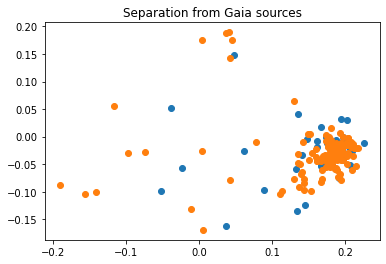

In [32]:
pl.title("Separation from Gaia sources")
pl.scatter(dra, ddec);
pl.scatter(crowddra, crowdddec);

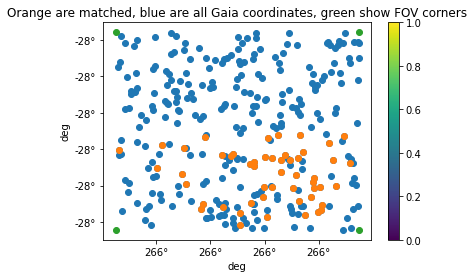

In [33]:
with quantity_support():
    pl.scatter(gaiacrds.ra, gaiacrds.dec)
    pl.scatter(gaiacrds.ra[sidx], gaiacrds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()
    pl.title("Orange are matched, blue are all Gaia coordinates, green show FOV corners")

In [34]:
idx, sidx, sep, sep3d = twomass_crds.search_around_sky(skycrds_cat, 0.2*u.arcsec)

In [35]:
len(idx)

53

In [36]:
dra = skycrds_cat[idx].ra - twomass_crds[sidx].ra
ddec = skycrds_cat[idx].dec - twomass_crds[sidx].dec

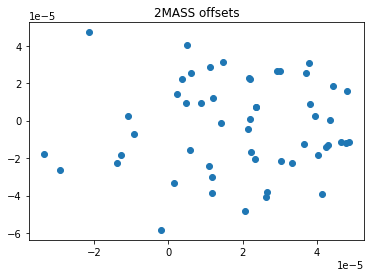

In [37]:
pl.title("2MASS offsets")
pl.scatter(dra, ddec);

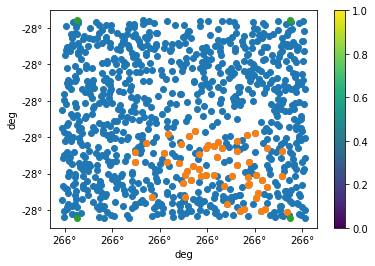

In [38]:
with quantity_support():
    pl.scatter(twomass_crds.ra, twomass_crds.dec)
    pl.scatter(twomass_crds.ra[sidx], twomass_crds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

In [39]:
idx, sidx, sep, sep3d = galnuc2021_crds.search_around_sky(skycrds_cat, 0.2*u.arcsec)

In [40]:
len(idx)

1259

In [41]:
dra = (skycrds_cat[idx].ra - galnuc2021_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[idx].dec - galnuc2021_crds[sidx].dec).to(u.arcsec)

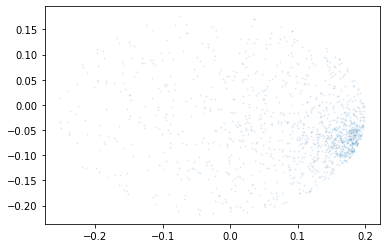

In [42]:
pl.scatter(dra, ddec, s=1, alpha=0.1)

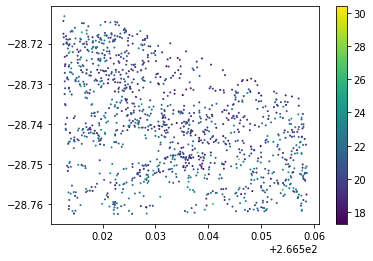

In [43]:
pl.scatter(skycrds_cat[idx].ra, skycrds_cat[idx].dec, c=cat['aper30_abmag'][idx], s=1)
pl.colorbar()

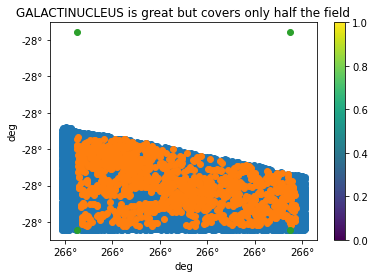

In [44]:
with quantity_support():
    pl.scatter(galnuc2021_crds.ra, galnuc2021_crds.dec)
    pl.scatter(galnuc2021_crds.ra[sidx], galnuc2021_crds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()
    pl.title("GALACTINUCLEUS is great but covers only half the field")

# VVV offsets

I don't understand what I'm seeing here.  In the CARTA catalog overlay, the VVV sources are not offset (for f410m) - they are aligned with the data.  For F405N, the offset is clear

The crowdsource catalog is perfectly aligned.

How can there be an offset in this plot?

The original catalog (``_cat.ecsv``) is produced by the JWST pipeline.

In [45]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat, 0.4*u.arcsec)
downsel = cat['aper_total_vegamag']<15
downselidx, downselsidx, downselsep, downselsep3d = vvvdr2_crds.search_around_sky(skycrds_cat[downsel], 0.4*u.arcsec)

crowdidx, crowdsidx, crowdsep, crowdsep3d = vvvdr2_crds.search_around_sky(skycrds_crowdcat, 0.4*u.arcsec)

In [46]:
len(idx), len(downselidx), len(crowdidx)

(978, 813, 3493)

In [47]:
dra = (skycrds_cat[idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

crowddra = (skycrds_crowdcat[crowdidx].ra - vvvdr2_crds[crowdsidx].ra).to(u.arcsec)
crowdddec = (skycrds_crowdcat[crowdidx].dec - vvvdr2_crds[crowdsidx].dec).to(u.arcsec)

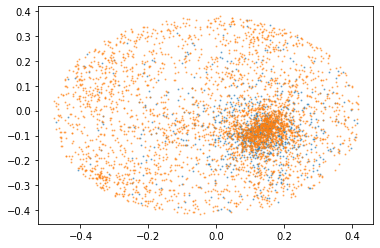

In [48]:
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(crowddra, crowdddec, s=1, alpha=0.5)

In [49]:
downseldra = (skycrds_cat[downsel][downselidx].ra - vvvdr2_crds[downselsidx].ra).to(u.arcsec)
downselddec = (skycrds_cat[downsel][downselidx].dec - vvvdr2_crds[downselsidx].dec).to(u.arcsec)

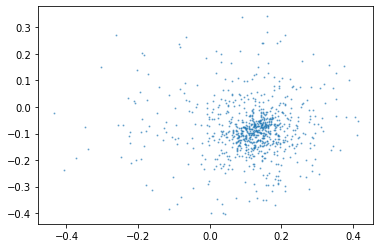

In [50]:
pl.scatter(downseldra, downselddec, s=1, alpha=0.5)
#pl.scatter(crowddra, crowdddec, s=1, alpha=0.5)

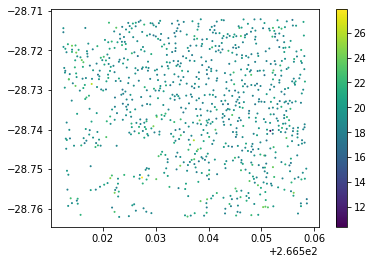

In [51]:
pl.scatter(skycrds_cat[idx].ra, skycrds_cat[idx].dec, c=cat['aper30_abmag'][idx], s=1)
pl.colorbar()

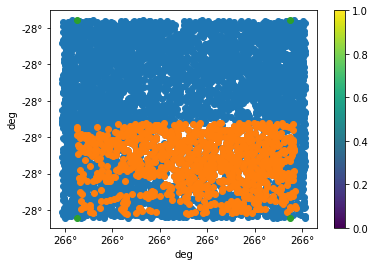

In [52]:
with quantity_support():
    pl.scatter(vvvdr2_crds.ra, vvvdr2_crds.dec)
    pl.scatter(vvvdr2_crds.ra[sidx], vvvdr2_crds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

# VVV

VVV looks pretty good superposed on the images.

The offset is generally <0.2 arcsec, often <0.1, but there's a systematic shift.

The flux range that matches is:

F187N : ~ 500 - 3000 MJy/sr

F182M, F212N: seems ~same-ish

Actually looks same-ish for the long wave too

Argh, what's the MJy/sr conversion?

In [53]:
from astropy.wcs import WCS
from astropy.io import fits

In [54]:
ww =  WCS(fits.getheader(imfile, ext=('SCI', 1)))
pixscale = ww.proj_plane_pixel_area()

Set OBSGEO-B to   -20.646359 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526234830.949 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [55]:
import numpy as np

## Approximate Jy/beam

In [56]:
(u.MJy/u.sr * (2*np.pi * (8*np.log(2)) * 2.5**2 * pixscale)).to(u.Jy)

<Quantity 2.02535435e-05 Jy>

but that doesn't seem to work.

Empirically,

8.5e-5 Jy -> 1933 MJy/sr
1.1e-5 Jy ->  165 MJy/sr
2.1e-5 Jy ->  350 MJy/sr

So there are ~70 nJy / (MJy/sr)

In [57]:
1.1e-5 / 165

6.666666666666667e-08

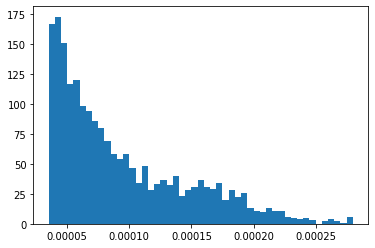

In [58]:
flux = (cat['aper30_abmag'].value * u.ABmag).to(u.Jy)
pl.hist(flux.value, bins=np.linspace(7e-8 * 500, 7e-8 * 4000))
sel = (flux > 7e-8*500*u.Jy) & (flux < 4000*7e-8*u.Jy)

In [59]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat[sel], 0.4*u.arcsec)

In [60]:
len(idx)

590

In [61]:
dra = (skycrds_cat[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

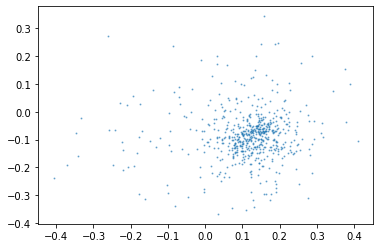

In [62]:
pl.scatter(dra, ddec, s=1, alpha=0.5)

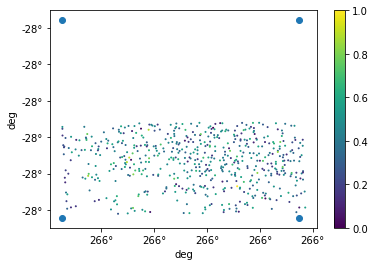

In [63]:
with quantity_support():
    pl.scatter(skycrds_cat[sel][idx].ra, skycrds_cat[sel][idx].dec, c=cat['aper30_abmag'][idx], s=1)
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

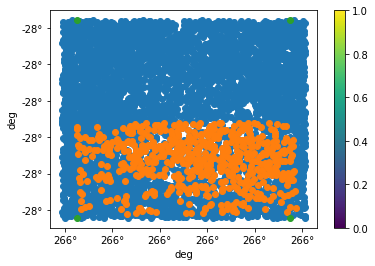

In [64]:
with quantity_support():
    pl.scatter(vvvdr2_crds.ra, vvvdr2_crds.dec)
    pl.scatter(vvvdr2_crds[sidx].ra, vvvdr2_crds[sidx].dec)
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

In [65]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat[sel], 0.4*u.arcsec)
dra = (skycrds_cat[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

0.124959arcsec -0.0869446arcsec


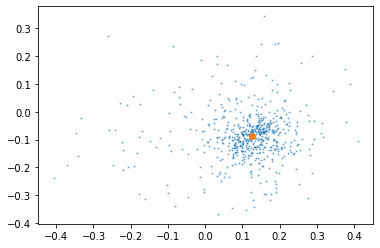

In [66]:
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec))

In [67]:
ww =  WCS(fits.getheader(imfile, ext=('SCI', 1)))
ww.wcs.crval = ww.wcs.crval - [np.median(dra).to(u.deg).value, np.median(ddec).to(u.deg).value]
with fits.open(imfile, mode='update') as hdulist:
    print(hdulist[1].header['CRVAL1'],
          hdulist[1].header['CRVAL2'])
    hdulist[1].header.update(ww.to_header())
    print(hdulist[1].header['CRVAL1'],
          hdulist[1].header['CRVAL2'])

Set OBSGEO-B to   -20.646359 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526234830.949 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


266.53555334221 -28.737291521132
266.53551863129 -28.737267369862


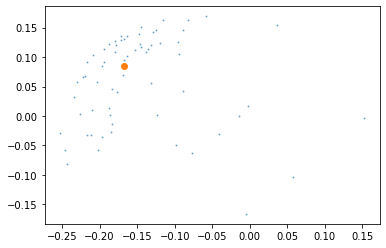

In [68]:
skycrds_cat_new = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat_new[sel], 0.2*u.arcsec)
dra = (skycrds_cat_new[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat_new[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec))

# Check what's happening in the overlap zones

In [69]:
from astropy import wcs

In [70]:
import regions
module_overlap = regions.Regions.read(f'{basepath}/regions/overlap_region.reg')
module_overlap

<Regions([<RectangleSkyRegion(center=<SkyCoord (ICRS): (ra, dec) in deg
    (266.535674, -28.71300934)>, width=11.3759 arcsec, height=150.5041 arcsec, angle=0.0 deg)>])>

In [71]:
import warnings

In [72]:
def check_overlap_zone(filtername = 'f212n'):
    fig = pl.figure(1, figsize=(10,5))
    pl.suptitle(filtername)
    
    ax1 = pl.subplot(1,2,1)
    ax2 = pl.subplot(1,2,2)

    for module in ('nrca', 'nrcb'):
        catfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_cat.ecsv'
        imfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_i2d.fits'
        imfile_realigned = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_realigned-to-refcat.fits'
        cat = Table.read(catfile)
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            ww = wcs.WCS(fits.getheader(imfile_realigned, ext=('SCI', 1)))
        
        skycrds_cat = cat['sky_centroid']
        realigned_skycrds = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])
        
        for crds, ax, title in [(skycrds_cat, ax1, 'original'),
                                (realigned_skycrds, ax2, 'realigned')]:
            ax.set_title(title)
            sel = module_overlap[0].contains(crds, ww)

            idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(crds, 0.3*u.arcsec)

            dra_all = (crds[idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
            ddec_all = (crds[idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

            idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(crds[sel], 0.3*u.arcsec)

            dra = (crds[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
            ddec = (crds[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

            ax.axhline(0, color='k', linestyle=':')
            ax.axvline(0, color='k', linestyle=':')
            ax.scatter(dra_all, ddec_all, s=1, alpha=0.2, label=module)
            ax.scatter(dra, ddec, s=3, alpha=0.5, marker='s', label=module)
            ax.scatter(np.median(dra), np.median(ddec), marker='x', s=100)
            ax.axis([-0.3, 0.3, -0.3, 0.3])
    return fig

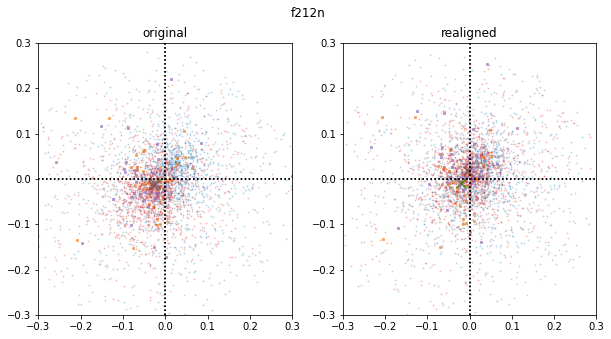

In [73]:
check_overlap_zone('f212n');

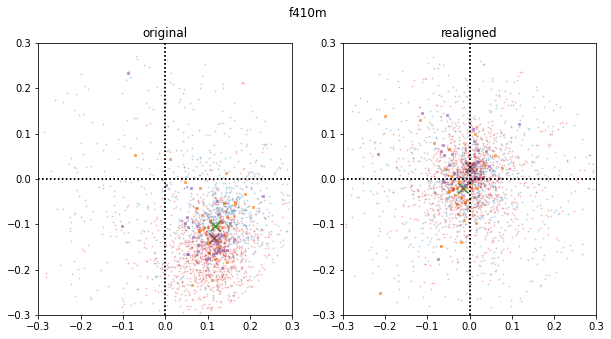

In [74]:
check_overlap_zone('f410m');

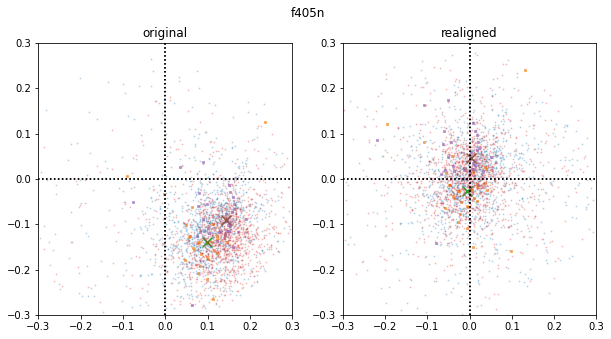

In [75]:
check_overlap_zone('f405n');

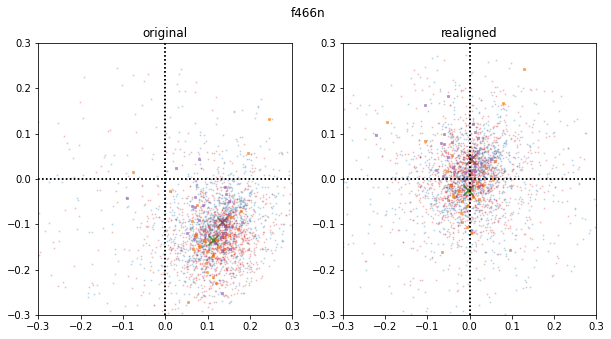

In [76]:
check_overlap_zone('f466n');

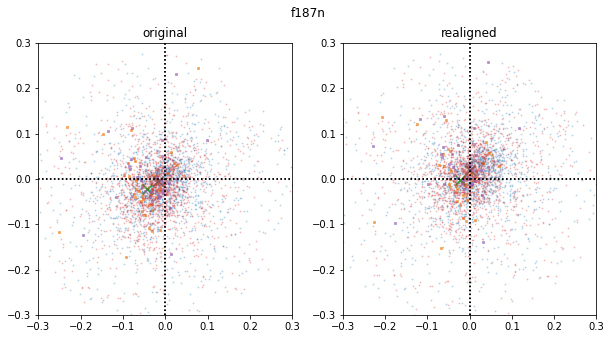

In [77]:
check_overlap_zone('f187n');

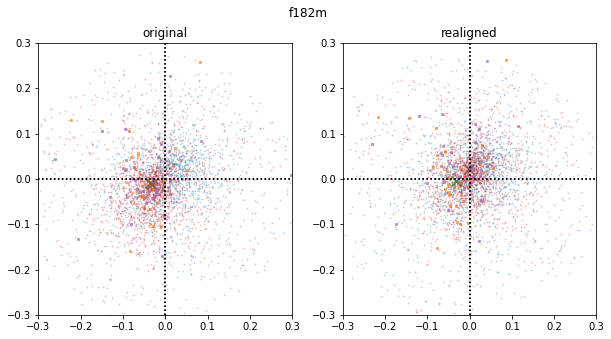

In [78]:
check_overlap_zone('f182m');

# "Production Run" test 

In [79]:
%run $basepath/reduction/align_to_catalogs.py

<Figure size 432x288 with 0 Axes>

In [80]:
main()

2023-07-13T17:53:20.869065:
2023-07-13T17:53:20.869227: Filter = f405n
2023-07-13T17:53:20.869238: f405n nrca
INFO: Realigning to vvv (module=nrca [unknown]


INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]
INFO: For f405n nrca 001 catalog /orange/adamginsburg/jwst/brick//F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-nrca_cat.ecsv, found 4125 of 5012 sources meeting criteria mag<15 [unknown]
2023-07-13T17:53:23.205017: Before realignment, offset is 0.10568937627795094 arcsec, -0.11083915498701913 arcsec.  Found 1140 matches.
2023-07-13T17:53:23.209802: CRVAL before 266.5356152731974 -28.73734529752632
2023-07-13T17:53:23.214094: CRVAL after 266.53558591504 -28.737314508872
2023-07-13T17:53:23.306019: After realignment, offset is 4.58731165053905e-05 arcsec, -0.002655147142149872 arcsec
2023-07-13T17:53:23.311212: CRVAL before 266.53558591504 -28.737314508872
2023-07-13T17:53:23.315924: CRVAL after 266.5355859023 -28.737313771331
2023-07-13T17:53:23.406048: After re-realignment, offset is -4.311973498261068e-05 arcsec, -7.659842680141082e-05 arcsec
INFO: Realigning to refcat (module=nrca [unknown]
INFO: For f405n nr

INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]
INFO: For f405n nrcb 001 catalog /orange/adamginsburg/jwst/brick//F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-nrcb_cat.ecsv, found 4000 of 4666 sources meeting criteria mag<15 [unknown]
2023-07-13T17:53:26.942759: Before realignment, offset is 0.13853532905159227 arcsec, -0.12847503314645792 arcsec.  Found 1257 matches.
2023-07-13T17:53:26.947530: CRVAL before 266.5356007339733 -28.688662975694427
2023-07-13T17:53:26.951738: CRVAL after 266.53556225194 -28.688627288185
2023-07-13T17:53:27.043249: After realignment, offset is 0.002048471651505679 arcsec, -0.004477475708597467 arcsec
2023-07-13T17:53:27.048522: CRVAL before 266.53556225194 -28.688627288185
2023-07-13T17:53:27.053296: CRVAL after 266.53556168292 -28.688626044442
2023-07-13T17:53:27.143559: After re-realignment, offset is 1.3701628631679341e-05 arcsec, -0.00010854779475266696 arcsec
INFO: Realigning to refcat (module=nrcb [unknown]
INFO: For f405n

INFO: Kept 853 out of 4693 VVV stars using ksmag_limit>15 [unknown]
INFO: For f410m nrca 001 catalog /orange/adamginsburg/jwst/brick//F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-nrca_cat.ecsv, found 2372 of 6034 sources meeting criteria mag<15 [unknown]
2023-07-13T17:53:35.073263: Before realignment, offset is -0.23337782031376264 arcsec, 0.16532961516304567 arcsec.  Found 263 matches.
2023-07-13T17:53:35.078492: CRVAL before 266.53551863129 -28.737267369862
2023-07-13T17:53:35.082770: CRVAL after 266.53558345846 -28.737313294755
2023-07-13T17:53:35.164439: After realignment, offset is -0.006977453699619218 arcsec, 0.003838273980250051 arcsec
2023-07-13T17:53:35.169351: CRVAL before 266.53558345846 -28.737313294755
2023-07-13T17:53:35.173972: CRVAL after 266.53558539664 -28.737314360942
2023-07-13T17:53:35.260614: After re-realignment, offset is -8.144525054376572e-08 arcsec, 1.0231815394945443e-09 arcsec
INFO: Realigning to refcat (module=nrca [unknown]
INFO: For f410m nrca 00

INFO: Kept 853 out of 4693 VVV stars using ksmag_limit>15 [unknown]
INFO: For f410m nrcb 001 catalog /orange/adamginsburg/jwst/brick//F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-nrcb_cat.ecsv, found 3908 of 4922 sources meeting criteria mag<15 [unknown]
2023-07-13T17:53:38.514134: Before realignment, offset is 0.11657136092253495 arcsec, -0.15136170798655257 arcsec.  Found 261 matches.
2023-07-13T17:53:38.519266: CRVAL before 266.5356012684754 -28.68866490326875
2023-07-13T17:53:38.523361: CRVAL after 266.53556888754 -28.68862285835
2023-07-13T17:53:38.605884: After realignment, offset is 9.693816309663816e-05 arcsec, -0.004962295233923442 arcsec
2023-07-13T17:53:38.610712: CRVAL before 266.53556888754 -28.68862285835
2023-07-13T17:53:38.615246: CRVAL after 266.53556886061 -28.688621479935
2023-07-13T17:53:38.703061: After re-realignment, offset is -2.6275301934219897e-07 arcsec, -1.3301360013429075e-09 arcsec
INFO: Realigning to refcat (module=nrcb [unknown]
INFO: For f410m nr

INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]
INFO: For f466n nrca 001 catalog /orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrca_cat.ecsv, found 3701 of 4518 sources meeting criteria mag<15 [unknown]
2023-07-13T17:53:46.812334: Before realignment, offset is 0.12072838912899897 arcsec, -0.1070945735293094 arcsec.  Found 1193 matches.
2023-07-13T17:53:46.817472: CRVAL before 266.53561150585915 -28.73734422244671
2023-07-13T17:53:46.821600: CRVAL after 266.5355779702 -28.737314473954
2023-07-13T17:53:46.905584: After realignment, offset is 0.0008267251587312785 arcsec, -0.0019432931424034905 arcsec
2023-07-13T17:53:46.910523: CRVAL before 266.5355779702 -28.737314473954
2023-07-13T17:53:46.915199: CRVAL after 266.53557774055 -28.73731393415
2023-07-13T17:53:47.003912: After re-realignment, offset is -2.9698867365368642e-05 arcsec, -0.00013531896243534902 arcsec
INFO: Realigning to refcat (module=nrca [unknown]
INFO: For f466n 

INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]
INFO: For f466n nrcb 001 catalog /orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrcb_cat.ecsv, found 3389 of 4520 sources meeting criteria mag<15 [unknown]
2023-07-13T17:53:50.312191: Before realignment, offset is 0.1298634842669344 arcsec, -0.1283468775483243 arcsec.  Found 1241 matches.
2023-07-13T17:53:50.574686: CRVAL before 266.53559400214715 -28.688662966426627
2023-07-13T17:53:50.579640: CRVAL after 266.53555792896 -28.688627314516
2023-07-13T17:53:50.665946: After realignment, offset is 0.0016707065810805943 arcsec, -0.004005955164387842 arcsec
2023-07-13T17:53:50.671108: CRVAL before 266.53555792896 -28.688627314516
2023-07-13T17:53:50.675981: CRVAL after 266.53555746487 -28.688626201751
2023-07-13T17:53:50.765997: After re-realignment, offset is -5.55689894099487e-07 arcsec, -5.464169277047404e-05 arcsec
INFO: Realigning to refcat (module=nrcb [unknown]
INFO: For f466n n

INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]
INFO: For f182m nrca 001 catalog /orange/adamginsburg/jwst/brick//F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-nrca_cat.ecsv, found 308 of 20162 sources meeting criteria mag<15 [unknown]
2023-07-13T17:54:01.269500: Before realignment, offset is 0.01664691920950645 arcsec, 0.017087202782306576 arcsec.  Found 254 matches.
2023-07-13T17:54:01.274221: CRVAL before 266.53548139394 -28.737394576545
2023-07-13T17:54:01.278565: CRVAL after 266.5354767698 -28.73739932299
2023-07-13T17:54:01.383908: After realignment, offset is -0.0001542908648843877 arcsec, 2.586999414688762e-05 arcsec
2023-07-13T17:54:01.389055: CRVAL before 266.5354767698 -28.73739932299
2023-07-13T17:54:01.393605: CRVAL after 266.53547681266 -28.737399330176
2023-07-13T17:54:01.485321: After re-realignment, offset is 6.548361852765083e-09 arcsec, 3.581135388230905e-10 arcsec
INFO: Realigning to refcat (module=nrca [unknown]
INFO: For f182m nrca 001 c

INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]
INFO: For f182m nrcb 001 catalog /orange/adamginsburg/jwst/brick//F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-nrcb_cat.ecsv, found 510 of 22093 sources meeting criteria mag<15 [unknown]
2023-07-13T17:54:10.462363: Before realignment, offset is 0.001681603873748827 arcsec, 0.010354877979068533 arcsec.  Found 416 matches.
2023-07-13T17:54:10.467152: CRVAL before 266.53552346893 -28.68886501449
2023-07-13T17:54:10.471810: CRVAL after 266.53552300182 -28.688867890845
2023-07-13T17:54:10.581695: After realignment, offset is -0.0006200008442647231 arcsec, 0.00011758708566844689 arcsec
2023-07-13T17:54:10.586893: CRVAL before 266.53552300182 -28.688867890845
2023-07-13T17:54:10.591633: CRVAL after 266.53552317404 -28.688867923508
2023-07-13T17:54:10.684010: After re-realignment, offset is -1.524540493846871e-08 arcsec, 1.8545165403338615e-10 arcsec
INFO: Realigning to refcat (module=nrcb [unknown]
INFO: For f182m nrc

INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]
INFO: For f182m merged 001 catalog /orange/adamginsburg/jwst/brick//F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-merged_cat.ecsv, found 785 of 41119 sources meeting criteria mag<15 [unknown]
2023-07-13T17:54:24.559086: Before realignment, offset is -0.00542022419267596 arcsec, 0.025891090871255074 arcsec.  Found 643 matches.
2023-07-13T17:54:24.563935: CRVAL before 266.53556188318 -28.713156071889
2023-07-13T17:54:24.568392: CRVAL after 266.5355633888 -28.713163263859
2023-07-13T17:54:24.701723: After realignment, offset is 0.0001270056827706867 arcsec, -0.004233827330324402 arcsec
2023-07-13T17:54:24.706821: CRVAL before 266.5355633888 -28.713163263859
2023-07-13T17:54:24.711539: CRVAL after 266.53556335352 -28.713162087796
2023-07-13T17:54:24.809280: After re-realignment, offset is 3.2250682124868035e-07 arcsec, -6.650680006714538e-10 arcsec
INFO: Realigning to refcat (module=merged [unknown]
INFO: For f182m 

INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]
INFO: For f187n nrca 001 catalog /orange/adamginsburg/jwst/brick//F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-nrca_cat.ecsv, found 627 of 16420 sources meeting criteria mag<15 [unknown]
2023-07-13T17:54:38.391250: Before realignment, offset is 0.011885186211202381 arcsec, 0.01257871588009607 arcsec.  Found 472 matches.
2023-07-13T17:54:38.396032: CRVAL before 266.53548149097 -28.737392949416
2023-07-13T17:54:38.400685: CRVAL after 266.53547818953 -28.737396443504
2023-07-13T17:54:38.502857: After realignment, offset is -0.0009147704417955538 arcsec, 0.0013656391409710977 arcsec
2023-07-13T17:54:38.507991: CRVAL before 266.53547818953 -28.737396443504
2023-07-13T17:54:38.512603: CRVAL after 266.53547844363 -28.737396822848
2023-07-13T17:54:38.602296: After re-realignment, offset is -0.0001237028527611983 arcsec, 0.00011740797134507375 arcsec
INFO: Realigning to refcat (module=nrca [unknown]
INFO: For f187n nrca

INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]
INFO: For f187n nrcb 001 catalog /orange/adamginsburg/jwst/brick//F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-nrcb_cat.ecsv, found 914 of 18208 sources meeting criteria mag<15 [unknown]
2023-07-13T17:54:47.137414: Before realignment, offset is 0.004005896619219129 arcsec, 0.006679062845194039 arcsec.  Found 672 matches.
2023-07-13T17:54:47.142178: CRVAL before 266.53552349706 -28.688867364739
2023-07-13T17:54:47.146293: CRVAL after 266.53552238431 -28.688869220034
2023-07-13T17:54:47.248897: After realignment, offset is -3.316827132948674e-05 arcsec, 0.0006060927759676815 arcsec
2023-07-13T17:54:47.253957: CRVAL before 266.53552238431 -28.688869220034
2023-07-13T17:54:47.258627: CRVAL after 266.53552239352 -28.688869388393
2023-07-13T17:54:47.642046: After re-realignment, offset is 6.589289114344865e-08 arcsec, 3.836930773104541e-10 arcsec
INFO: Realigning to refcat (module=nrcb [unknown]
INFO: For f187n nrcb 

INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]
INFO: For f187n merged 001 catalog /orange/adamginsburg/jwst/brick//F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-merged_cat.ecsv, found 1396 of 36119 sources meeting criteria mag<15 [unknown]
2023-07-13T17:55:01.571783: Before realignment, offset is -0.013681224447736895 arcsec, 0.02369034817277793 arcsec.  Found 1054 matches.
2023-07-13T17:55:01.576934: CRVAL before 266.53555954879 -28.713156167951
2023-07-13T17:55:01.581610: CRVAL after 266.53556334913 -28.713162748603
2023-07-13T17:55:01.672840: After realignment, offset is 0.0007249063173730974 arcsec, -0.0028039445773231364 arcsec
2023-07-13T17:55:01.678431: CRVAL before 266.53556334913 -28.713162748603
2023-07-13T17:55:01.683217: CRVAL after 266.53556314777 -28.71316196973
2023-07-13T17:55:01.777787: After re-realignment, offset is 6.638749709964031e-05 arcsec, -6.458059687020068e-05 arcsec
INFO: Realigning to refcat (module=merged [unknown]
INFO: For f18

INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]
INFO: For f212n nrca 001 catalog /orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-nrca_cat.ecsv, found 1092 of 22581 sources meeting criteria mag<15 [unknown]
2023-07-13T17:55:15.463987: Before realignment, offset is 0.008605394668848021 arcsec, 0.007702852736457544 arcsec.  Found 790 matches.
2023-07-13T17:55:15.468750: CRVAL before 266.53548031218 -28.737395058511
2023-07-13T17:55:15.473365: CRVAL after 266.53547792179 -28.737397198192
2023-07-13T17:55:15.585072: After realignment, offset is 0.0004507759285843349 arcsec, 0.0006302872463948006 arcsec
2023-07-13T17:55:15.590235: CRVAL before 266.53547792179 -28.737397198192
2023-07-13T17:55:15.594675: CRVAL after 266.53547779657 -28.737397373272
2023-07-13T17:55:15.687896: After re-realignment, offset is 8.10359779279679e-08 arcsec, -7.290168468898628e-10 arcsec
INFO: Realigning to refcat (module=nrca [unknown]
INFO: For f212n nrca 

INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]
INFO: For f212n nrcb 001 catalog /orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-nrcb_cat.ecsv, found 1332 of 22632 sources meeting criteria mag<15 [unknown]
2023-07-13T17:55:25.343803: Before realignment, offset is 0.00044951291329198284 arcsec, 0.007484604552132623 arcsec.  Found 917 matches.
2023-07-13T17:55:25.348870: CRVAL before 266.5355245273 -28.688866883579
2023-07-13T17:55:25.353659: CRVAL after 266.53552440244 -28.688868962636
2023-07-13T17:55:25.443708: After realignment, offset is -0.0004693300979852211 arcsec, -4.220623850414995e-10 arcsec
2023-07-13T17:55:25.449310: CRVAL before 266.53552440244 -28.688868962636
2023-07-13T17:55:25.454019: CRVAL after 266.53552453281 -28.688868962636
2023-07-13T17:55:25.545885: After re-realignment, offset is 1.8417267710901797e-09 arcsec, -4.220623850414995e-10 arcsec
INFO: Realigning to refcat (module=nrcb [unknown]
INFO: For f212n 

INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]
INFO: For f212n merged 001 catalog /orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_cat.ecsv, found 2366 of 44292 sources meeting criteria mag<15 [unknown]
2023-07-13T17:55:40.193076: Before realignment, offset is -0.011728122115073347 arcsec, 0.02049384245026431 arcsec.  Found 1646 matches.
2023-07-13T17:55:40.243417: CRVAL before 266.53556261765 -28.713159276992
2023-07-13T17:55:40.247911: CRVAL after 266.53556587546 -28.713164969726
2023-07-13T17:55:40.339531: After realignment, offset is 0.0017141884200100321 arcsec, -0.002322366312057511 arcsec
2023-07-13T17:55:40.344824: CRVAL before 266.53556587546 -28.713164969726
2023-07-13T17:55:40.349553: CRVAL after 266.5355653993 -28.713164324624
2023-07-13T17:55:40.450061: After re-realignment, offset is 0.0009183392990053107 arcsec, -0.00015234616128623202 arcsec
INFO: Realigning to refcat (module=merged [unknown]
INFO: For f21

In [81]:
# do this in a dedicated slurm job

# TEST aligning using tweakreg

In [82]:
from tweakwcs import JWSTgWCS, align_wcs, JWSTWCSCorrector, FITSWCSCorrector
from astropy.table import Table
from jwst.datamodels import ImageModel

# to update FITS WCS of the data models next import
# requires installing dev version of the pipeline
from jwst.assign_wcs.util import update_fits_wcsinfo


# This only works with L2 files

In [83]:
dm1 = ImageModel(imfile)
dm1.meta.wcs.available_frames

['detector', 'world']

In [84]:
imcat1 = cat
imcat1['x'] = imcat1['xcentroid']
imcat1['y'] = imcat1['ycentroid']
refcat = vvvdr2
refcat['RA'] = refcat['RAJ2000']
refcat['DEC'] = refcat['DEJ2000']

corr1 = FITSWCSCorrector(dm1.get_fits_wcs(),# dm1.meta.wcsinfo.instance,
                 meta={'catalog': imcat1, 'group_id': 1})

# align images to the reference catalog:
aligned_cat = align_wcs([corr1,], refcat=refcat) # + add other arguments as needed - see docs

2023-07-13 17:55:54,824 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.508342 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.646359 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526234830.949 from OBSGEO-[XYZ]'.
  warnings.warn(

2023-07-13 17:55:54,829 - stpipe - INFO -  
2023-07-13 17:55:54,830 - stpipe - INFO - ***** tweakwcs.imalign.align_wcs() started on 2023-07-13 17:55:54.829756
2023-07-13 17:55:54,831 - stpipe - INFO -       Version 0.8.3.dev2+ga9bf1b1
2023-07-13 17:55:54,831 - stpipe - INFO -  
2023-07-13 17:55:55,416 - stpipe - INFO - Aligning image catalog 'GROUP ID: 1' to the reference catalog.
2023-07-13 17:55:55,428 - stpipe - INFO - Running XYXYMatch.__call__
2023-07-13 17:55:55,428 - stpipe - INFO - Matching sources from 'Unknown' catalog with sources from the reference 'II/348/vvv2' catalog.
2023-07-13 17:55:55,429 - stpipe - INFO - Estimating offset using 2dhist_shift
2023-07

INFO: running stimage.xyxymatch [stsci.stimage]


dm1.meta.wcs = corr1.wcs
update_fits_wcsinfo(dm1, npoints=16) # <- update FITS WCS too (optionally). Repeat for each model below

# save image models to different files but one can also overwrite existing models:
#dm1.write(imfile.replace(".fits", "_wcscorrected_vvv.fits"))

# Crossmatch F212N with VVV, then we'll save that and use it as our reference case


Work done Oct 20, 2022

Idea is to establish a new and *usable* master table, since VVV stars are mostly saturated in JW.

In [85]:
basepath = '/blue/adamginsburg/adamginsburg/jwst/brick'

In [86]:
cd $basepath

/blue/adamginsburg/adamginsburg/jwst/brick


In [87]:
filtername = 'f212n'
module = 'nrca'
catfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_cat.ecsv'
imfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_i2d.fits'
cat = Table.read(catfile)
#cat.write(catfile.replace('ecsv', 'fits'), overwrite=True) # for CARTA viewing

Catalogs:

 * F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_cat.ecsv
 * F212N/f212n_?merged?_crowdsource.fits doesn't exist yet
 * F212N/f212n_?merged?_daophot_iterative.fits doesn't exist yet

In [88]:
# TODO: replace nrca w/full

crowdtbl = Table.read('F212N/f212n_nrca_crowdsource.fits')
crowdheader = fits.getheader('F212N/f212n_nrca_crowdsource.fits')
daobasictbl = Table.read('F212N/f212n_nrca_daophot_basic.fits')
daoitertbl = Table.read('F212N/f212n_nrca_daophot_iterative.fits')
len(crowdtbl), len(daobasictbl), len(daoitertbl)

(152674, 139289, 175208)

In [89]:
if 'skycoord' not in crowdtbl.colnames:
    print ("Swapping coords")
    # I've now fixed crowdtbl to include skycoord, but it hasn't run yet
    ww = wcs.WCS(crowdheader)
    # crowdtbl are still backwards now
    crowdtbl['skycoord'] = ww.pixel_to_world(crowdtbl['y'], crowdtbl['x'])

In [90]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(daobasictbl['skycoord_centroid'], 0.5*u.arcsec)
dra = (daobasictbl['skycoord_centroid'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (daobasictbl['skycoord_centroid'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

2023-07-13T17:55:58.660903: -0.0074893arcsec -0.0143671arcsec


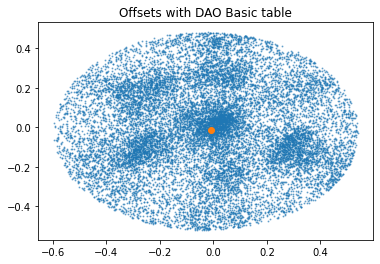

In [91]:
pl.title("Offsets with DAO Basic table")
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec));

In [92]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(daoitertbl['skycoord_centroid'], 0.5*u.arcsec)
dra = (daoitertbl['skycoord_centroid'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (daoitertbl['skycoord_centroid'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

2023-07-13T17:55:59.414878: -0.0138199arcsec -0.018242arcsec


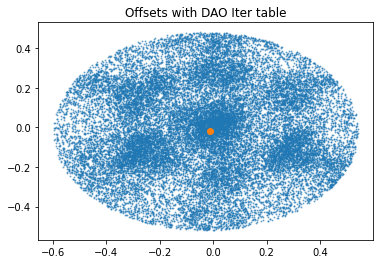

In [93]:
pl.title("Offsets with DAO Iter table")
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec));

In [94]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(crowdtbl['skycoord'], 0.5*u.arcsec)
dra = (crowdtbl['skycoord'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (crowdtbl['skycoord'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

2023-07-13T17:55:59.988179: -0.0185652arcsec -0.0130552arcsec


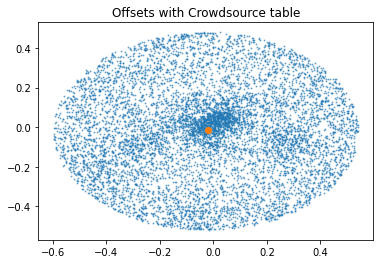

In [95]:
pl.title("Offsets with Crowdsource table")
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec));

### Intermediate conclusions:

The iter table performed best but still quite poorly.  Only matches within <0.15 arcsec are remotely valid, so more source rejection is needed to get a good result.

In [96]:
satstarcat = Table.read('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_i2d_satstar_catalog.fits')
if 'skycoord_fit' not in satstarcat.colnames:
    ww = WCS(fits.getheader('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_i2d.fits', ext=('SCI', 1)))
    satstarcat['skycoord_fit'] = ww.pixel_to_world(satstarcat['x_fit'], satstarcat['y_fit'])
    satstarcat.write('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_i2d_satstar_catalog.fits', overwrite=True)
satstarcat[:5]

<Table length=5>
       x_0               y_0               flux_0         id  group_id       x_fit              y_fit             flux_fit           flux_unc             x_0_unc               y_0_unc                     skycoord_fit             
                                                                                                                                                                                                              deg,deg                
     float64           float64            float64       int64  int64        float64            float64            float64            float64              float64               float64                       SkyCoord               
----------------- ------------------ ------------------ ----- -------- ------------------ ------------------ ------------------ ------------------ --------------------- --------------------- --------------------------------------
           4392.0 2451.6296296296296  5100930.742232717     1        1  4392.668978913317 2451.6181068689857  27758378.77555784  137549.9554598297  0.006228761875453327 0.0061030202595884885  266.53607561834065,-28.72514243090599
           3300.0             1834.5  2284819.791889226     1        1 3300.1798157245225 1834.4207303751925 6602208.5599235995 10643.508801170985 0.0024493905857886156 0.0021551824220927304  266.52998085964236,-28.73461015086031
6253.882352941177  2440.294117647059 3045456.4361582296     2        2  6253.966581794648  2440.071029587738 10109590.508189386 18599.899937979433 0.0028506168737210138  0.002129794365668625 266.53595476832214,-28.709015230988125
7008.466666666666  3541.866666666667 2607852.8356461287     3        3  7008.242437598293 3542.0017586821677  7969430.131457171 11860.696966592368 0.0025730488753887048  0.002128593847617649  266.5468372377257,-28.702475853518724
            358.5  4386.285714285715 2780096.6312134536     4        4  358.8362960505485  4386.002544414916   9219473.43989309  19361.19361881539 0.0029140432157813375 0.0027124729958961334  266.55520928255527,-28.76008609028865

### Try to reject sources near saturated sources (about 0.4" in F4* and 0.95" (?!?!) in F1*)

In [97]:
satcrd = satstarcat['skycoord_fit']
daoitercrd = daoitertbl['skycoord_centroid']
idx_s, sidx_s, sep_s, sep3d_s = satcrd.search_around_sky(daoitertbl['skycoord_centroid'], 0.95*u.arcsec)
len(idx_s), len(sidx_s), len(sep_s), len(sep3d_s)

(6074, 6074, 6074, 6074)

In [98]:
inds = np.arange(len(daoitercrd))
unsat_inds = inds[~np.in1d(inds, idx_s)]
#daoitercrd_nosat = daoitercrd[unsat_inds]
daoitertbl_nosat = daoitertbl[unsat_inds]

In [99]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(daoitertbl['skycoord_centroid'], 0.5*u.arcsec)
sat_idx = np.isin(idx, idx_s)
dra = (daoitertbl['skycoord_centroid'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (daoitertbl['skycoord_centroid'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
dra_s = (daoitertbl['skycoord_centroid'][idx[sat_idx]].ra - vvvdr2_crds[sidx[sat_idx]].ra).to(u.arcsec)
ddec_s = (daoitertbl['skycoord_centroid'][idx[sat_idx]].dec - vvvdr2_crds[sidx[sat_idx]].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

2023-07-13T17:56:01.131526: -0.0138199arcsec -0.018242arcsec


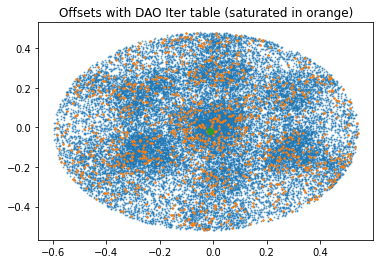

In [100]:
pl.title("Offsets with DAO Iter table (saturated in orange)")
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(dra_s, ddec_s, s=2, alpha=1)
pl.scatter(np.median(dra), np.median(ddec));

## Try to match saturated star centroids

In [101]:
satcrd = satstarcat['skycoord_fit']
idx_s, sidx_s, sep_s, sep3d_s = satcrd.search_around_sky(vvvdr2_crds, 0.5*u.arcsec)
dra_s = (satcrd[sidx_s].ra - vvvdr2_crds[idx_s].ra).to(u.arcsec)
ddec_s = (satcrd[sidx_s].dec - vvvdr2_crds[idx_s].dec).to(u.arcsec)
len(idx_s), len(satcrd), len(vvvdr2_crds)

(83, 168, 4693)

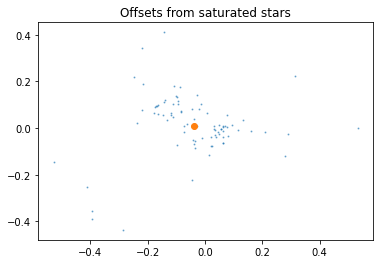

In [102]:
pl.title("Offsets from saturated stars")
pl.scatter(dra_s, ddec_s, s=1, alpha=0.5)
pl.scatter(np.median(dra_s), np.median(ddec_s));

In [103]:
# for each coordinate in DAO catalog, find VVV match (for plotting)
daoitercrd_nosat = daoitertbl_nosat['skycoord_centroid']
idx, sidx, sep, sep3d = daoitercrd_nosat.search_around_sky(vvvdr2_crds, 0.5*u.arcsec)
dra = (daoitercrd_nosat[sidx].ra - vvvdr2_crds[idx].ra).to(u.arcsec)
ddec = (daoitercrd_nosat[sidx].dec - vvvdr2_crds[idx].dec).to(u.arcsec)
len(idx), len(daoitercrd), len(vvvdr2_crds)

(25699, 175208, 4693)

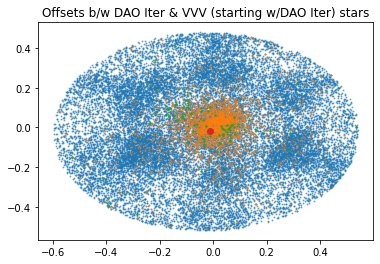

In [104]:
pl.title("Offsets b/w DAO Iter & VVV (starting w/DAO Iter) stars")
pl.scatter(dra, ddec, s=1, alpha=0.5)
bright = daoitertbl_nosat['flux_fit'][sidx] > 1e4
pl.scatter(dra[bright], ddec[bright], s=1, alpha=0.5)
pl.scatter(dra_s, ddec_s, s=2, alpha=1)
pl.scatter(np.median(dra), np.median(ddec));

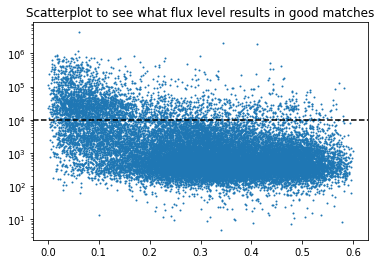

In [105]:
pl.title("Scatterplot to see what flux level results in good matches")
pl.scatter((dra**2 + ddec**2)**0.5, daoitertbl_nosat['flux_fit'][sidx], s=1)
pl.semilogy();
pl.axhline(1e4, color='k', linestyle='--');

In [106]:
# for each coordinate in DAO catalog, find VVV match (for saving)
daoitercrd_nosat = daoitertbl_nosat['skycoord_centroid']
bright = daoitertbl_nosat['flux_fit'] > 1e4
idxd, sepd, _ = daoitercrd_nosat[bright].match_to_catalog_sky(vvvdr2_crds)

drad = (daoitercrd_nosat[bright].ra - vvvdr2_crds[idxd].ra).to(u.arcsec)
ddecd = (daoitercrd_nosat[bright].dec - vvvdr2_crds[idxd].dec).to(u.arcsec)

# then, for each vvv object, find the closest DAO
idxv, sepv, _ = vvvdr2_crds.match_to_catalog_sky(daoitercrd_nosat[bright])
drav = (daoitercrd_nosat[bright][idxv].ra - vvvdr2_crds.ra).to(u.arcsec)
ddecv = (daoitercrd_nosat[bright][idxv].dec - vvvdr2_crds.dec).to(u.arcsec)

len(idxd), len(idxv), bright.sum(), len(vvvdr2_crds)

(5306, 4693, 5306, 4693)

(-0.5, 0.5, -0.5, 0.5)

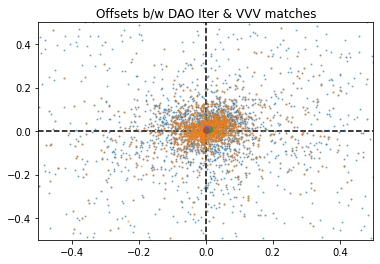

In [107]:
pl.title("Offsets b/w DAO Iter & VVV matches")
pl.scatter(drad, ddecd, s=1, alpha=0.5)
pl.scatter(drav, ddecv, s=1, alpha=0.5)
pl.scatter(np.median(drad), np.median(ddecd));
pl.scatter(np.median(drav), np.median(ddecv));
pl.scatter(np.median(drad[sepd<0.15*u.arcsec]), np.median(ddecd[sepd<0.15*u.arcsec]));
pl.scatter(np.median(drav[sepv<0.15*u.arcsec]), np.median(ddecv[sepv<0.15*u.arcsec]));
pl.axhline(0, color='k', linestyle='--', zorder=-5)
pl.axvline(0, color='k', linestyle='--', zorder=-5);
pl.axis([-0.5,0.5,-0.5,0.5])

# Conclusions again: There's no offset?

So, what the hell?  Why do the catalogs _look_ so offset when overlaid on the data?

Maybe it's just that the catalogs have never run to completion on the final data.

## Revisiting VVV x-matching June 28, 2023

Examining the VVV catalog overlaid on the realigned catalogs in `refcat_to_410_check` in CARTA, it looks like there are very few stars that actually get matched to JWST stars reasonably.

So a more careful treatment of the x-matching is needed.


Manual inspection, going 12..13, 14..15, etc., the first magnitude bin that is OK for F410M is 15..16, so >15 seems appropriate.

For F405N, though, >11 mag works

# Some plots for the paper

todo - show that offset ~ zero

In [108]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [109]:
import sys
if '' in sys.path:
    sys.path.remove('')

In [110]:
%run $basepath/analysis/analysis_setup.py
basetable = basetable_merged

2023-07-13 17:56:02,762 - stpipe - WARNING - /orange/adamginsburg/jwst/brick/analysis/analysis_setup.py:4: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import sys, imp

2023-07-13 17:56:02,883 - stpipe - WARNING - /orange/adamginsburg/jwst/brick/analysis/analysis_setup.py:19: DeprecationWarning: `photutils.CircularAperture` is a deprecated alias for `photutils.aperture.CircularAperture` and will be removed in the future. Instead, please use `from photutils.aperture import CircularAperture` to silence this warning.
  from photutils import CircularAperture, EPSFBuilder, find_peaks, CircularAnnulus

2023-07-13 17:56:02,884 - stpipe - WARNING - /orange/adamginsburg/jwst/brick/analysis/analysis_setup.py:19: DeprecationWarning: `photutils.EPSFBuilder` is a deprecated alias for `photutils.psf.EPSFBuilder` and will be removed in the future. Instead, please use `from photutils.psf import EPSFBuilder` to silence th

For module nrca catalog crowdsource_nsky0_nrca_photometry_tables_merged.fits, mod date is 2023-07-10 12:59:10
For module nrcb catalog crowdsource_nsky0_nrcb_photometry_tables_merged.fits, mod date is 2023-07-10 13:45:36
For module merged catalog crowdsource_nsky0_merged_photometry_tables_merged.fits, mod date is 2023-07-10 11:57:17
For module merged-reproject catalog crowdsource_nsky0_merged-reproject_photometry_tables_merged.fits, mod date is 2023-07-10 10:28:07


<Figure size 1000x800 with 0 Axes>

In [111]:
%run $basepath/analysis/selections.py --module=merged
assert len(basetable) == len(basetable_merged)

2023-07-13 17:56:23,422 - stpipe - WARNING - /orange/adamginsburg/jwst/brick/analysis/selections.py:17: DeprecationWarning: `photutils.CircularAperture` is a deprecated alias for `photutils.aperture.CircularAperture` and will be removed in the future. Instead, please use `from photutils.aperture import CircularAperture` to silence this warning.
  from photutils import CircularAperture, EPSFBuilder, find_peaks, CircularAnnulus

2023-07-13 17:56:23,422 - stpipe - WARNING - /orange/adamginsburg/jwst/brick/analysis/selections.py:17: DeprecationWarning: `photutils.EPSFBuilder` is a deprecated alias for `photutils.psf.EPSFBuilder` and will be removed in the future. Instead, please use `from photutils.psf import EPSFBuilder` to silence this warning.
  from photutils import CircularAperture, EPSFBuilder, find_peaks, CircularAnnulus

2023-07-13 17:56:23,423 - stpipe - WARNING - /orange/adamginsburg/jwst/brick/analysis/selections.py:17: DeprecationWarning: `photutils.find_peaks` is a deprecated 

For module nrca catalog crowdsource_nsky0_nrca_photometry_tables_merged.fits, mod date is 2023-07-10 12:59:10
For module nrcb catalog crowdsource_nsky0_nrcb_photometry_tables_merged.fits, mod date is 2023-07-10 13:45:36
For module merged catalog crowdsource_nsky0_merged_photometry_tables_merged.fits, mod date is 2023-07-10 11:57:17
For module merged-reproject catalog crowdsource_nsky0_merged-reproject_photometry_tables_merged.fits, mod date is 2023-07-10 10:28:07
Selecting module merged

NRCA
612 saturated in near_saturated_f212n_f212n
32 saturated in near_saturated_f466n_f466n
498 saturated in near_saturated_f405n_f405n
278 saturated in near_saturated_f187n_f187n
2757 saturated in near_saturated_f182m_f182m
6061 near saturated out of 295443.  That leaves 289382 not near unsaturated
70 saturated in replaced_saturated_f212n
9 saturated in replaced_saturated_f466n
125 saturated in replaced_saturated_f405n
19 saturated in replaced_saturated_f187n
117 saturated in replaced_saturated_f182m


In [112]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(basetable['skycoord_f410m'], 0.5*u.arcsec)
dra = (basetable['skycoord_f410m'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (basetable['skycoord_f410m'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

2023-07-13T17:56:44.241274: -0.00486921arcsec -0.00364596arcsec


In [113]:
%run $basepath/reduction/align_to_catalogs.py

In [114]:
vvvdr2_crds, vvvdr2 = retrieve_vvv(basepath=basepath, filtername=filtername, module='merged',
                                   fov_regname='regions/nircam_brick_fov.reg')
reference_coordinates = vvvdr2_crds

In [115]:
skycrds_cat = basetable['skycoord_f410m']
skycrds_cat_mrgrep = basetable_merged_reproject['skycoord_f410m']
skycrds_cat_a = basetable_nrca['skycoord_f410m']
skycrds_cat_b = basetable_nrcb['skycoord_f410m']
idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[all_good], 0.4*u.arcsec)
idxmr, sidxmr, sepmr, sep3dmr = reference_coordinates.search_around_sky(skycrds_cat_mrgrep[all_good_mr], 0.4*u.arcsec)
idxa, sidxa, sepa, sep3da = reference_coordinates.search_around_sky(skycrds_cat_a[all_good_a], 0.4*u.arcsec)
idxb, sidxb, sepb, sep3db = reference_coordinates.search_around_sky(skycrds_cat_b[all_good_b], 0.4*u.arcsec)

In [116]:
len(skycrds_cat), len(basetable), len(vvvdr2), sel.sum(), idx.max(), sidx.max()

(552596, 552596, 4693, 932, 43363, 4687)

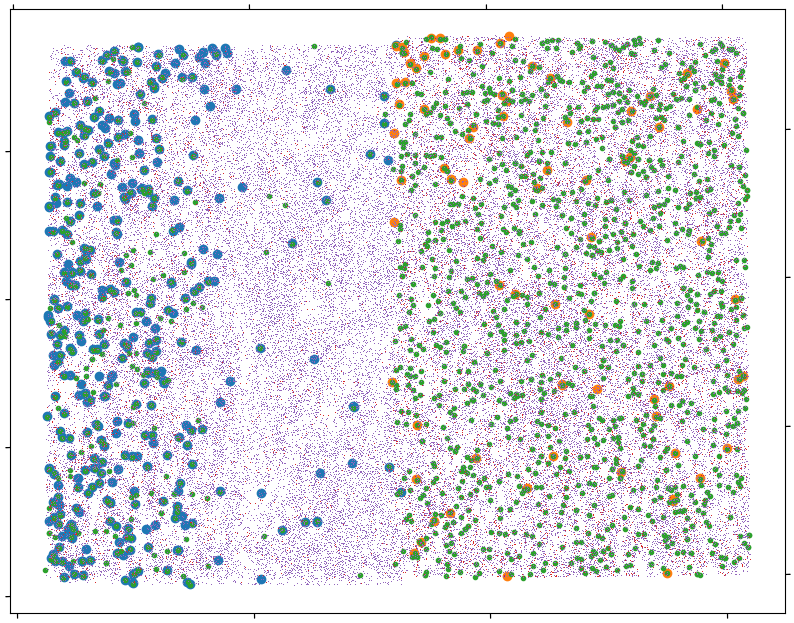

In [117]:
ax = pl.subplot(projection=ww_merged)
ax.plot_coord(skycrds_cat_a[all_good_a][idxa], 'o')
ax.plot_coord(skycrds_cat_b[all_good_b][idxb], 'o')
ax.plot_coord(vvvdr2_crds[sidx], '.')
ax.plot_coord(skycrds_cat[all_good], ',')
ax.plot_coord(skycrds_cat_mrgrep[all_good_mr], ',')

# Flux Calibration Check

### F212 vs VVVK plot

There are significant differences betwen NRCA, NRCB, and merged.

They are strict offsets in magnitude, so I guess multiplicative?

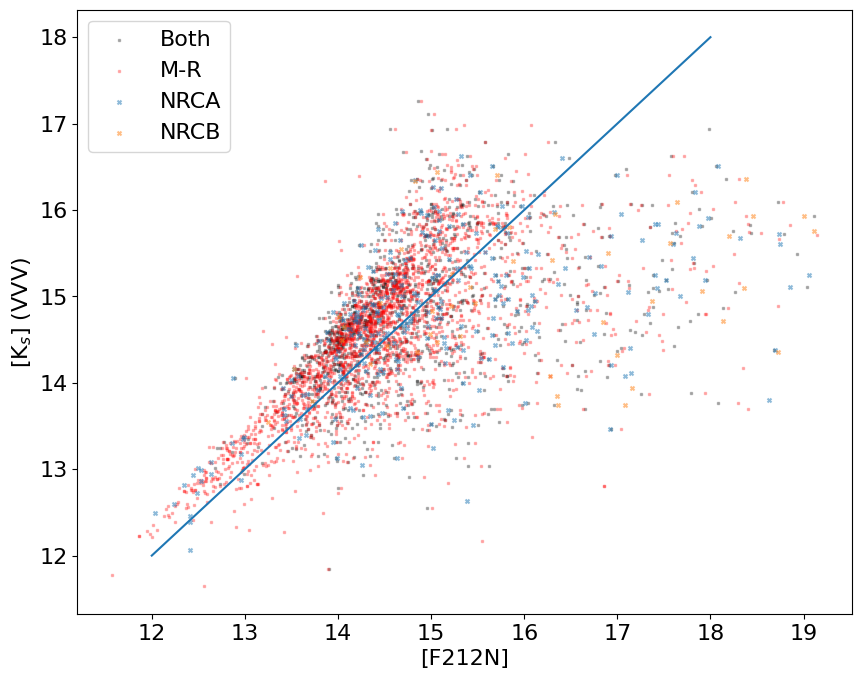

In [118]:
pl.scatter(basetable['mag_ab_f212n'][all_good][idx], vvvdr2['Ksmag3'][sidx], marker=',', s=1, alpha=0.25, color='k', label='Both')
pl.scatter(basetable_merged_reproject['mag_ab_f212n'][all_good_mr][idxmr], vvvdr2['Ksmag3'][sidxmr],
           marker=',', s=1, alpha=0.25, color='r', label='M-R')
pl.scatter(basetable_nrca['mag_ab_f212n'][all_good_a][idxa], vvvdr2['Ksmag3'][sidxa], marker='x', s=8, alpha=0.5, label='NRCA')
pl.scatter(basetable_nrcb['mag_ab_f212n'][all_good_b][idxb], vvvdr2['Ksmag3'][sidxb], marker='x', s=8, alpha=0.5, label='NRCB')
pl.plot([12,18], [12,18])
pl.legend(loc='best')
pl.xlabel("[F212N]")
pl.ylabel("[K$_s$] (VVV)");

#### Why are there sources in 'basetable' not in nrca/nrcb?

## Using the "good" merged table, compare NRCA/NRCB fluxes

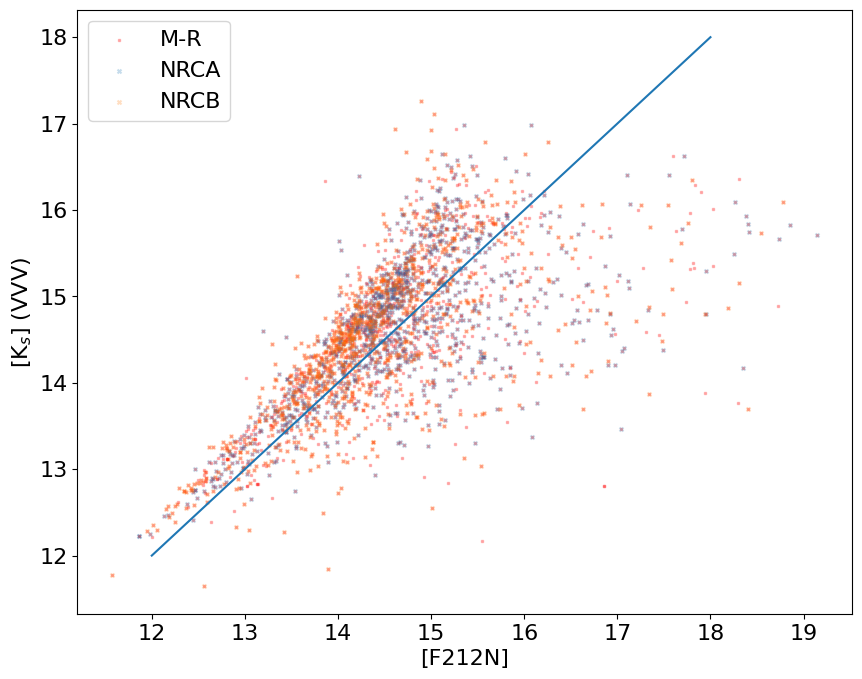

In [119]:
nrcasel = regions.Regions.read('regions/brick_nrca.reg')[0].contains(skycrds_cat_mrgrep[all_good_mr][idxmr], ww_mr)
nrcbsel = regions.Regions.read('regions/brick_nrcb.reg')[0].contains(skycrds_cat_mrgrep[all_good_mr][idxmr], ww_mr)
pl.scatter(basetable_merged_reproject['mag_ab_f212n'][all_good_mr][idxmr], vvvdr2['Ksmag3'][sidxmr],
           marker=',', s=1, alpha=0.25, color='r', label='M-R')
pl.scatter(basetable_merged_reproject['mag_ab_f212n'][all_good_mr][idxmr][nrcasel], vvvdr2['Ksmag3'][sidxmr][nrcasel],
           marker='x', s=8, alpha=0.25,  label='NRCA')
pl.scatter(basetable_merged_reproject['mag_ab_f212n'][all_good_mr][idxmr][nrcbsel], vvvdr2['Ksmag3'][sidxmr][nrcbsel],
           marker='x', s=8, alpha=0.25,  label='NRCB')
pl.plot([12,18], [12,18])
pl.legend(loc='best')
pl.xlabel("[F212N]")
pl.ylabel("[K$_s$] (VVV)");

Now it looks like there's no problem, just an expected wavelength-driven offset


# Crossmatch galnuc w/"best"

In [172]:
# Crossmatch galnuc w/"best"
idx, sidx, sep, sep3d = galnuc2021_crds.search_around_sky(skycrds_cat_mrgrep, 0.2*u.arcsec)
len(idx), len(sidx)

(65539, 65539)

In [173]:
len(basetable_merged_reproject)

488783

In [178]:
galnuc_merged = table.hstack([galnuc2021[sidx], basetable_merged_reproject[idx]])
galnuc_merged.write(f'{basepath}/catalogs/GALACTICNUCLEUS_2021_merged.fits', overwrite=True)

2023-07-14 13:48:33,416 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/io/fits/card.py:271: VerifyWarning: Keyword name 'description' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.
  warnings.warn(



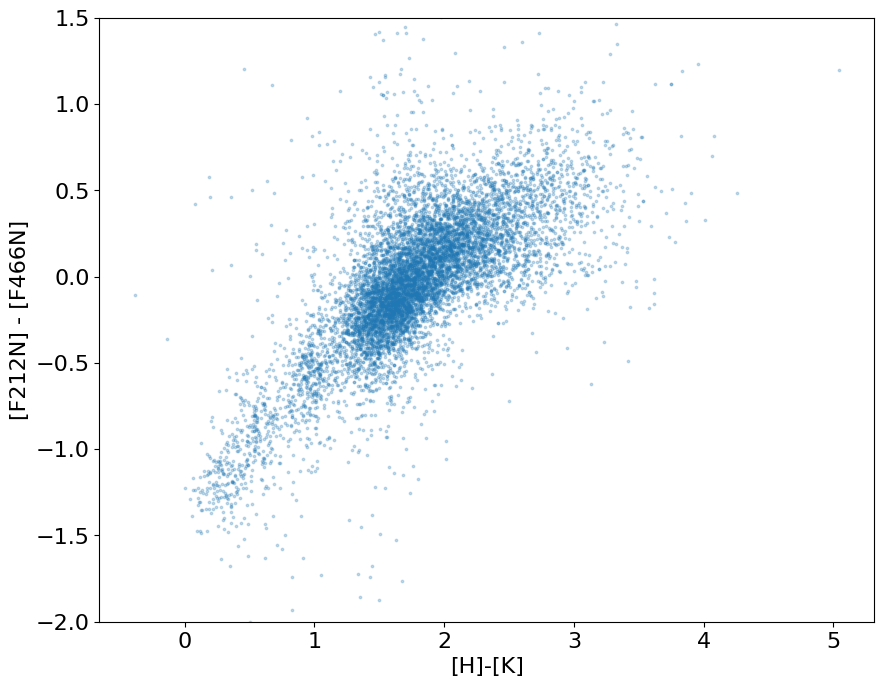

In [175]:
ok = all_good_mr[idx]
pl.scatter((galnuc_merged['Hmag'] - galnuc_merged['Ksmag'])[ok],
           (galnuc_merged['mag_ab_f212n'] - galnuc_merged['mag_ab_f466n'])[ok], s=3, alpha=0.25)
pl.xlabel("[H]-[K]")
pl.ylabel("[F212N] - [F466N]");
pl.ylim(-2, 1.5);

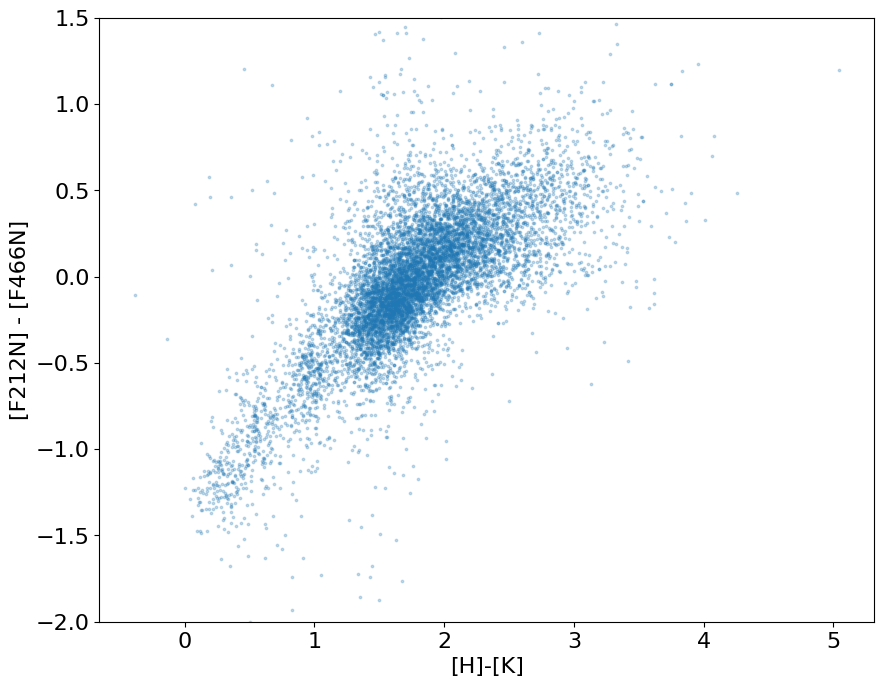

In [176]:
ok = all_good_mr[idx]
pl.scatter((galnuc2021[sidx]['Hmag'] - galnuc2021[sidx]['Ksmag'])[ok],
           (basetable_merged_reproject[idx]['mag_ab_f212n'] - basetable_merged_reproject[idx]['mag_ab_f466n'])[ok], s=3, alpha=0.25)
pl.xlabel("[H]-[K]")
pl.ylabel("[F212N] - [F466N]");
pl.ylim(-2, 1.5);

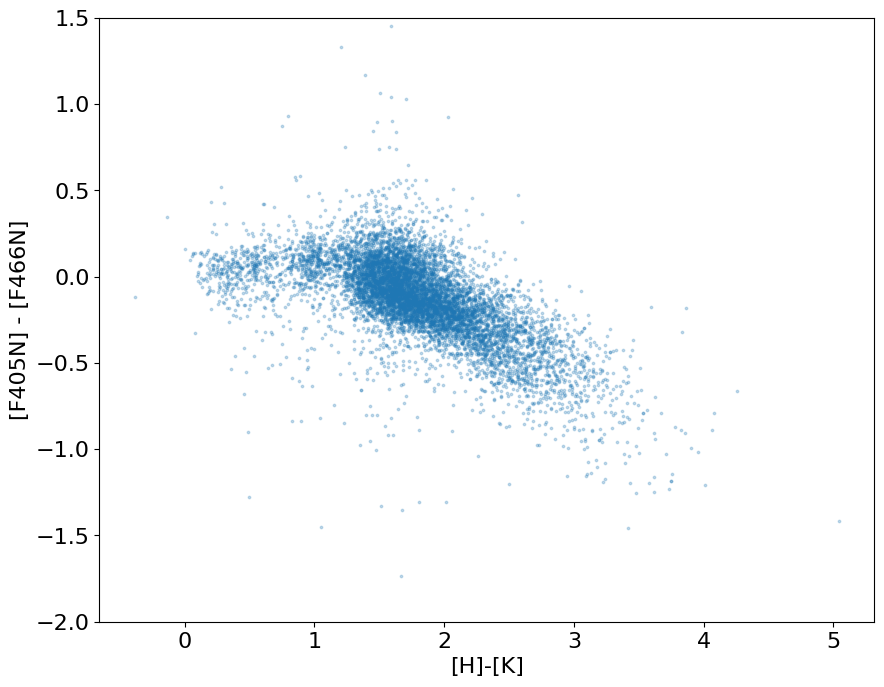

In [177]:
ok = all_good_mr[idx]
pl.scatter((galnuc_merged['Hmag'] - galnuc_merged['Ksmag'])[ok],
           (galnuc_merged['mag_ab_f405n'] - galnuc_merged['mag_ab_f466n'])[ok], s=3, alpha=0.25)
pl.xlabel("[H]-[K]")
pl.ylabel("[F405N] - [F466N]");
pl.ylim(-2, 1.5);

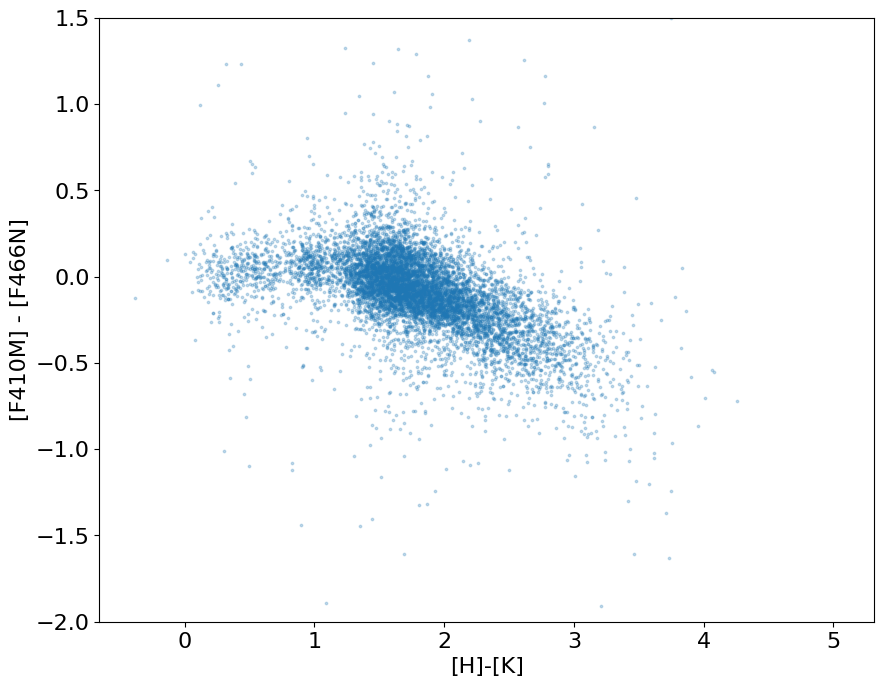

In [192]:
ok = all_good_mr[idx]
pl.scatter((galnuc_merged['Hmag'] - galnuc_merged['Ksmag'])[ok],
           (galnuc_merged['mag_ab_f410m'] - galnuc_merged['mag_ab_f466n'])[ok], s=3, alpha=0.25)
pl.xlabel("[H]-[K]")
pl.ylabel("[F410M] - [F466N]");
pl.ylim(-2, 1.5);

2023-07-14 14:03:48,877 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.530124 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.666215 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526468113.175 from OBSGEO-[XYZ]'.
  warnings.warn(



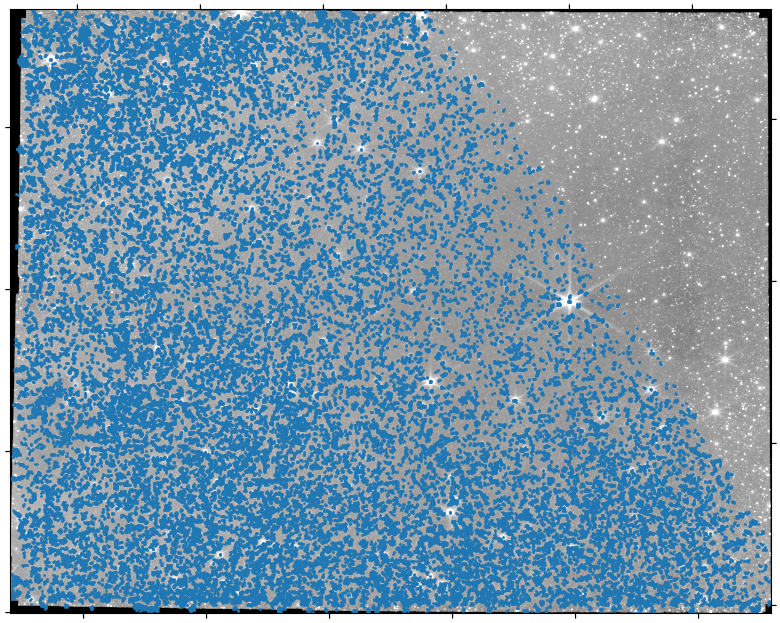

In [191]:
ax = pl.subplot(1,1,1, projection=WCS(fits.getheader(imfile, ext=1)))
ax.scatter_coord(galnuc_merged['skycoord_ref'], s=1)
data = fits.getdata(imfile, ext=1)
ax.imshow(data, norm=simple_norm(data, max_percent=99, min_percent=1, stretch='log'), cmap='gray')